In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.svm import SVC

In [2]:
data=pd.read_csv(r"C:\Users\TNF\Desktop\thesis\Train_data.csv")

In [3]:
data.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [4]:
data['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [5]:
label_encoder = preprocessing.LabelEncoder()
data['protocol_type']= label_encoder.fit_transform(data['protocol_type'])
data['protocol_type'].unique()

array([1, 2, 0])

In [6]:
data['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001'], dtype=object)

In [7]:
label_encoder = preprocessing.LabelEncoder()
data['service']= label_encoder.fit_transform(data['service'])
data['service'].unique()

array([19, 41, 46, 22, 48, 33, 35, 13, 32, 57, 17, 11, 55, 63,  2, 51,  6,
       62, 34, 61,  3, 10, 18,  4, 29, 14, 20, 64, 56, 23, 15, 65, 25, 26,
       12, 27, 30, 54, 31, 28, 52, 59, 21, 16, 40,  9, 39,  5,  7, 53,  8,
       50, 37, 44, 38,  0, 43, 45, 58, 42, 47, 36, 49,  1, 60, 24])

In [8]:
data['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [9]:
label_encoder = preprocessing.LabelEncoder()
data['flag']= label_encoder.fit_transform(data['flag'])
data['flag'].unique()

array([ 9,  5,  1,  4, 10,  2,  6,  3,  8,  7,  0])

In [10]:
x=data.drop('class', axis=1)
y=data['class']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5)

# Decission tree


In [11]:
%%time
DT = tree.DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)

Wall time: 102 ms


In [12]:
nb=DT.score(x_test,y_test)
p=100
m1=nb*p
print("Accuracy: ",m1)

Accuracy:  99.24579231502064


In [13]:
score1 = accuracy_score(y_test, y_pred) * 100 #score
print("Accuracy using desicion Tree: ", round(score1, 1), "%" )

Accuracy using desicion Tree:  99.2 %


In [14]:
DT_error=np.mean(y_pred != y_test) # error rate
DT_error

0.007542076849793585

Confusion Matrix:
 [[5909   39]
 [  56 6592]]
              precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      5948
      normal       0.99      0.99      0.99      6648

    accuracy                           0.99     12596
   macro avg       0.99      0.99      0.99     12596
weighted avg       0.99      0.99      0.99     12596



<AxesSubplot:>

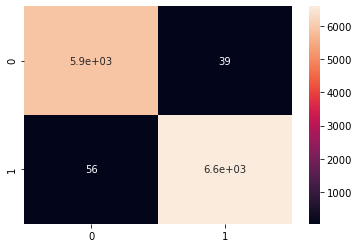

In [15]:
cm_dt= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_dt)
print(classification_report(y_test, y_pred))
sns.heatmap(cm_dt, annot=True)

In [16]:
# import time

# def procedure():
#    time.sleep(2.5)

# # measure process time
# t0 = time.clock()
# procedure()
# print (time.clock())

# # measure wall time
# t0 = time.time()
# procedure()
# print (time.time() - t0)

# Multi-layer precission


In [17]:
%%time
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
y_pred=mlp.predict(x_test)

Wall time: 4.21 s


In [18]:
nb=mlp.score(x_test,y_test)
p=100
m2=nb*p
print("Accuracy: ",m2)

Accuracy:  96.57827881867259


In [19]:
score2 = accuracy_score(y_test, y_pred) * 100
print("Accuracy using MLP: ", round(score2, 1), "%" )

Accuracy using MLP:  96.6 %


In [20]:
mlp_error=np.mean(y_pred != y_test) # error rate
mlp_error

0.03421721181327406

Confusion Matrix:
 [[5576  372]
 [  59 6589]]
              precision    recall  f1-score   support

     anomaly       0.99      0.94      0.96      5948
      normal       0.95      0.99      0.97      6648

    accuracy                           0.97     12596
   macro avg       0.97      0.96      0.97     12596
weighted avg       0.97      0.97      0.97     12596



<AxesSubplot:>

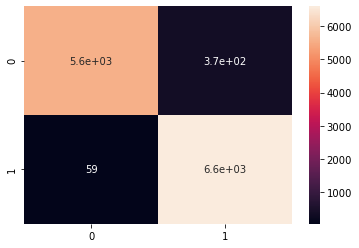

In [21]:
cm_mlp= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_mlp)
print(classification_report(y_test, y_pred))
sns.heatmap(cm_mlp, annot=True)

# Nurel Network

In [22]:
%%time
nn = MLPClassifier()
nn.fit(x_train, y_train)
y_pred=nn.predict(x_test)

Wall time: 1.74 s


In [23]:
nb=nn.score(x_test,y_test)
p=100
m3=nb*p
print("Accuracy: ",m3)

Accuracy:  96.94347411876785


In [24]:
score3 = accuracy_score(y_test, y_pred) * 100
print("Accuracy using NN: ", round(score3, 1), "%" )

Accuracy using NN:  96.9 %


In [25]:
nn_error=np.mean(y_pred != y_test) # error rate
nn_error

0.03056525881232137

Confusion Matrix:
 [[5757  191]
 [ 194 6454]]
              precision    recall  f1-score   support

     anomaly       0.97      0.97      0.97      5948
      normal       0.97      0.97      0.97      6648

    accuracy                           0.97     12596
   macro avg       0.97      0.97      0.97     12596
weighted avg       0.97      0.97      0.97     12596



<AxesSubplot:>

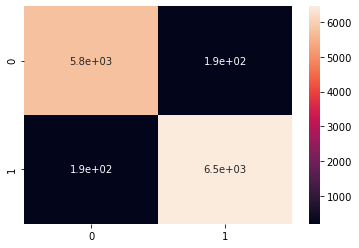

In [26]:
cm_nn= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_nn)
print(classification_report(y_test, y_pred))
sns.heatmap(cm_nn, annot=True)

# Random Forest

In [27]:
%%time
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)

Wall time: 1.27 s


In [28]:
nb=rf.score(x_test,y_test)
p=100
m4=nb*p
print("Accuracy: ",m4)

Accuracy:  99.64274372816767


In [29]:
score4 = accuracy_score(y_test, y_pred) * 100
print("Accuracy using : ", round(score4, 1), "%" )

Accuracy using :  99.6 %


In [30]:
rf_error=np.mean(y_pred != y_test) # error rate
rf_error

0.003572562718323277

Confusion Matrix:
 [[5920   28]
 [  17 6631]]
              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      5948
      normal       1.00      1.00      1.00      6648

    accuracy                           1.00     12596
   macro avg       1.00      1.00      1.00     12596
weighted avg       1.00      1.00      1.00     12596



<AxesSubplot:>

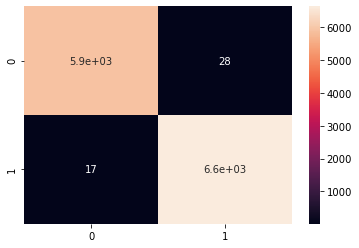

In [31]:
cm_rf= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_rf)
print(classification_report(y_test, y_pred))
sns.heatmap(cm_rf, annot=True)

# KNeighbors

In [32]:
%%time
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)
y_pred=kn.predict(x_test)


Wall time: 2.21 s


In [33]:
nb=kn.score(x_test,y_test)
p=100
m5=nb*p
print("Accuracy: ",m5)

Accuracy:  98.56303588440774


In [34]:
score5 = accuracy_score(y_test, y_pred) * 100
print("Accuracy using : ", round(score5, 1), "%" )

Accuracy using :  98.6 %


In [35]:
kn_error=np.mean(y_pred != y_test) # error rate
kn_error


0.014369641155922515

Confusion Matrix:
 [[5863   85]
 [  96 6552]]
              precision    recall  f1-score   support

     anomaly       0.98      0.99      0.98      5948
      normal       0.99      0.99      0.99      6648

    accuracy                           0.99     12596
   macro avg       0.99      0.99      0.99     12596
weighted avg       0.99      0.99      0.99     12596



<AxesSubplot:>

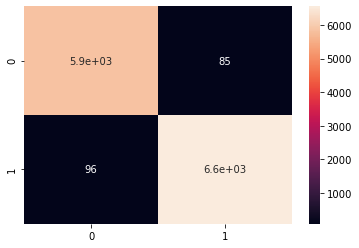

In [36]:
cm_kn= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_kn)
print(classification_report(y_test, y_pred))
sns.heatmap(cm_kn, annot=True)

# Naive Bayes

In [37]:
%%time
nby = BernoulliNB()
nby = nby.fit(x_train, y_train)
y_pred=nby.predict(x_test)

Wall time: 72.3 ms


In [38]:
nb=nby.score(x_test,y_test)
p=100
m6=nb*p
print("Accuracy: ",m6)

Accuracy:  89.52842172118133


In [39]:
score6 = accuracy_score(y_test, y_pred) * 100
print("Accuracy using : ", round(score6, 1), "%" )

Accuracy using :  89.5 %


In [40]:
nby_error=np.mean(y_pred != y_test) # error rate
nby_error

0.10471578278818673

Confusion Matrix:
 [[5035  913]
 [ 406 6242]]
              precision    recall  f1-score   support

     anomaly       0.93      0.85      0.88      5948
      normal       0.87      0.94      0.90      6648

    accuracy                           0.90     12596
   macro avg       0.90      0.89      0.89     12596
weighted avg       0.90      0.90      0.89     12596



<AxesSubplot:>

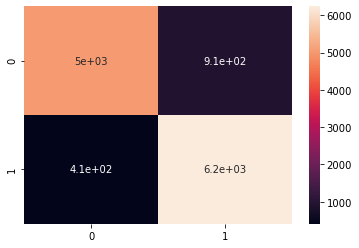

In [41]:
cm_nby= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_nby)
print(classification_report(y_test, y_pred))
sns.heatmap(cm_nby, annot=True)

# Support vector machine

In [42]:
%%time
svm = SVC()
svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)

Wall time: 30.3 s


In [43]:
nb=svm.score(x_test,y_test)
p=100
m7=nb*p
print("Accuracy: ",m7)

Accuracy:  84.70943156557638


In [44]:
score7 = accuracy_score(y_test, y_pred) * 100
print("Accuracy using : ", round(score7, 1), "%" )

Accuracy using :  84.7 %


In [45]:
svm_error=np.mean(y_pred != y_test) # error rate
svm_error

0.15290568434423626

Confusion Matrix:
 [[5797  151]
 [1775 4873]]
              precision    recall  f1-score   support

     anomaly       0.77      0.97      0.86      5948
      normal       0.97      0.73      0.83      6648

    accuracy                           0.85     12596
   macro avg       0.87      0.85      0.85     12596
weighted avg       0.87      0.85      0.85     12596



<AxesSubplot:>

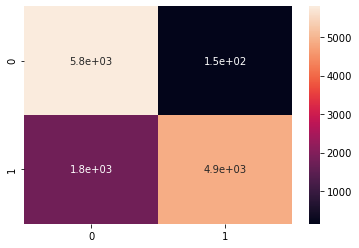

In [46]:
cm_svm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_svm)
print(classification_report(y_test, y_pred))
sns.heatmap(cm_svm, annot=True)